---
## Weihnachtsbäume in Zürich

### 0. Python vorbereiten
Importiere die Libraries `numpy` und `pandas`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1. Baumdaten einlesen und filtern:
Der **Baumkataster der Stadt Zürich** (`gsz.baumkataster_baumstandorte.csv`) enthält alle öffentlichen Baumstandorte, aber wir suchen nur nach **Nadelbäumen** (potenzielle Weihnachtsbäume).**Aufgabe:**1.  **Lade die Baumkataster-Datei** als DataFrame (`tree_data`).2.  **Filtere** die Daten (`baumname`) auf die Begriffe **'Tanne'** oder **'Fichte'** (`conifers`).

In [2]:
# 1. Baumdaten laden
tree_data = pd.read_csv('gsz.baumkataster_baumstandorte.csv')

# 2. Filtern nach Nadelbäumen ('Tanne' oder 'Fichte')
conifer_index = tree_data['baumname'].str.contains('Tanne|Fichte', case=False, na=False)
conifers = tree_data[conifer_index].copy()

print(f"Anzahl gefundener Nadelbäume: {len(conifers)}")

Anzahl gefundener Nadelbäume: 2191


---### 2. Geometriedaten vorbereitenWir laden die Nadelbaum-Koordinaten und die vorbereiteten Grenzen der Stadt Zürich (als Quartiere zusammengefasst).

In [16]:
### A) Baumstandorte parsen (POINTs)
# Extrahiere die X/Y-Koordinaten (LV95) aus dem 'geometry'-String
coords_split = conifers['geometry'].str.replace('POINT (', '', regex=False).str.replace(')', '', regex=False).str.split(' ')
conifers.loc[:, 'X_coord'] = coords_split.str[0].astype(float)
conifers.loc[:, 'Y_coord'] = coords_split.str[1].astype(float)

border_data.head()

,Easting_LV95,Northing_LV95
0,2.680000e+06,1247000.0
1,2.680333e+06,1247000.0
2,2.680667e+06,1247000.0
3,2.681000e+06,1247000.0
4,2.681333e+06,1247000.0


---### 3. Visualisierung (Karte mit Layering)**Aufgabe:**1.  **Plotte die Quartiergrenzen** (`border_data`) als graue Linien (Linienplot). 
2.  **Überlagere die Baumstandorte** (`conifers`) als grüne Punkte auf dieser Karte (Scatter-Plot).


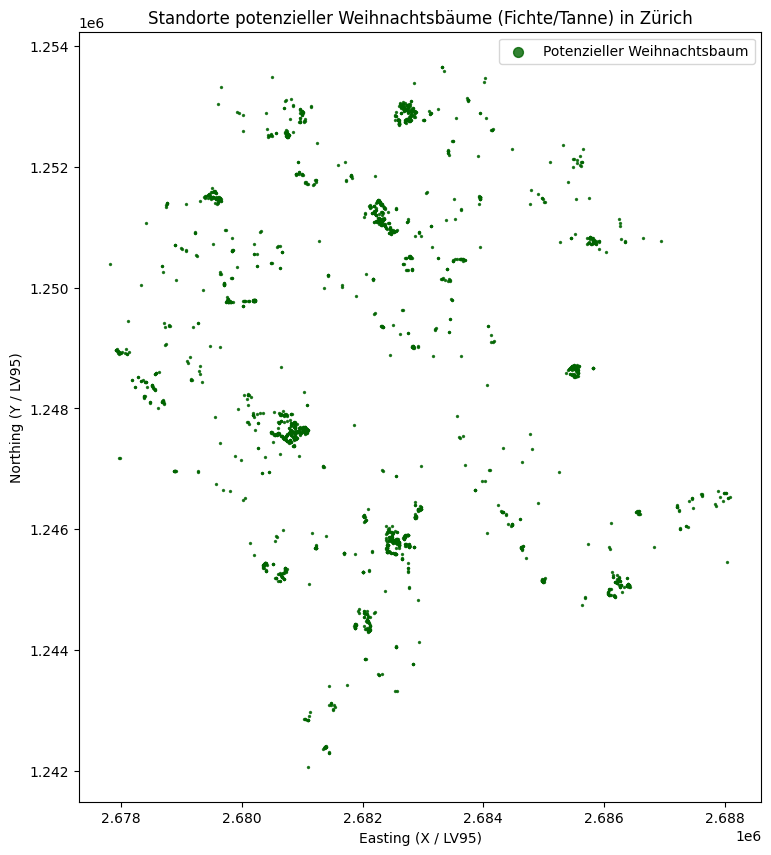

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))


# 2. Baumstandorte plotten (Overlay)
ax.scatter(conifers['X_coord'], conifers['Y_coord'], 
           s=2, color='darkgreen', alpha=0.8, label='Potenzieller Weihnachtsbaum')

# Setze Titel und Achsenbeschriftung (LV95 Koordinaten)
ax.set(title='Standorte potenzieller Weihnachtsbäume (Fichte/Tanne) in Zürich',
       xlabel='Easting (X / LV95)', 
       ylabel='Northing (Y / LV95)')

# Setze ein gleiches Seitenverhältnis für eine korrekte Karten-Ansicht
ax.set_aspect('equal', adjustable='box')
ax.legend(markerscale=5)
plt.show()